In [23]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt 


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from mpl_toolkits.mplot3d import axes3d, Axes3D

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('exercise.csv')

In [3]:
df

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [152]:
train = df.iloc[:40]
X_train = train.drop('y', axis=1)
y_train = train['y']
X_test = df.iloc[40:].drop('y', axis=1)

In [5]:
results = smf.ols('y~x1+x2', data=df).fit()

In [6]:
wyn = results.params
wyn

Intercept    1.315135
x1           0.514810
x2           0.806920
dtype: float64

In [153]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
intercept = linmodel.intercept_
weights = linmodel.coef_

In [154]:
preds = linmodel.predict(X_train)

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Sun, 08 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        22:26:05   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
mean_squared_error(y_train, preds)

0.74930538824643

In [58]:
r2_score(y_train, preds)

0.9724240642757969

## Wnioski

R2 dopasowanego modelu jest bardzo wysokie - opisuje prawie całą wariancję danych. Jest to jednak wynik dla danych treningowych, jako że nie mamy dostępu do prawdziwych wyników danych testowych.

In [42]:
def f(x, y):
    final_array = []
    
    
    for rowx, rowy in zip(x, y):
        this_array = []
        for pointx, pointy in zip(rowx, rowy):
            this_array.append(intercept+pointx*weights[0]+pointy*weights[1])
        final_array.append(this_array)
    return final_array

x = np.linspace(0, 10, 100)
y = np.linspace(0, 20, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

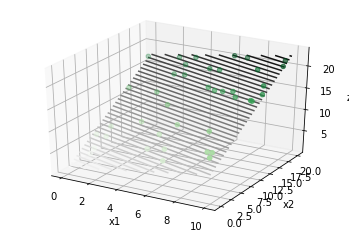

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.scatter3D(X_train['x1'], X_train['x2'], y_train, c=y_train, cmap='Greens');
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');

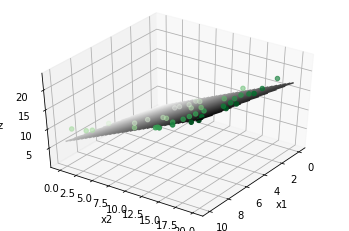

In [55]:
ax.view_init(40, 35)
fig

In [62]:
residuas = y_train - preds

## Residua zrzutowane dla X1

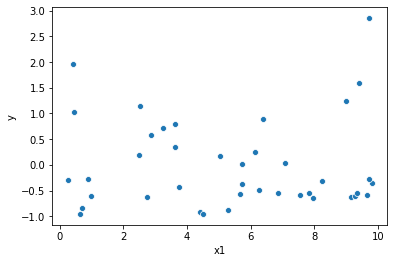

In [66]:
sns.scatterplot(x=X_train['x1'], y=residuas)

## Residua zrzutowane dla X2

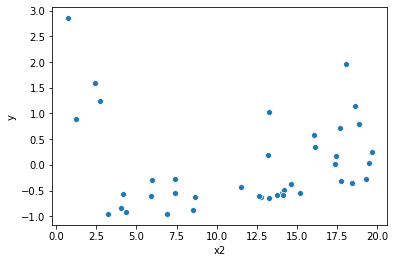

In [69]:
sns.scatterplot(x=X_train['x2'], y=residuas)

In [76]:
np.std(residuas)

0.8656242766041339

## Wnioski

Dla większości punktów wartość absolutna różnicy predykcji od rzecywistej wartości jest mniejsza od 1. Poniżej 1 jest też odchylenie standardowe residuów oraz MSE - wydaje się żę założenia zostały spełnione.

# Prognozy

In [71]:
linmodel.predict(X_test)

array([14.81248392, 19.14286547,  5.91681569, 10.53047509, 19.01248517,
       13.39886317,  4.8291436 ,  9.14576699,  5.89248891, 12.33863911,
       18.90856083, 16.06464851,  8.96312217, 14.97278637,  5.85974379,
        7.37490022,  4.53526736, 15.13328025,  9.10089896, 16.08490021])

In [72]:
X_test

,x1,x2
40,9.87,10.43
41,9.99,15.72
42,8.39,0.35
43,0.80,10.91
44,9.58,15.82
45,4.82,11.90
46,2.97,2.46
47,8.80,4.09
48,6.07,1.80
49,0.19,13.54


## Wnioski z prognoz
Dane ze zbioru testowego zawierają się w obszarze który jest dobrze reprezentowany przez dane treningowe, których wariancję dobrze opisuje model. Można więc być pewnym prognoz.

# Zadanie 2

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df2 = pd.read_csv('../../beauty.csv')

In [5]:
df2

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,93,0,32,9,6,6,5,7,8,...,0,0,42.85714,4.1,21,1,0,3.107088,1.143040,0.000000
459,0,93,0,32,9,6,6,5,7,8,...,0,0,60.46511,4.5,86,1,0,3.107088,1.143040,0.000000
460,0,94,1,42,7,3,8,4,4,6,...,1,0,77.61194,4.4,67,1,0,3.018447,0.332051,0.000000
461,0,94,1,42,7,3,8,4,4,6,...,1,0,81.81818,4.4,66,1,0,3.018447,0.332051,0.000000


In [6]:
X = df2.drop('courseevaluation', axis=1)
y = df2['courseevaluation']

Nie standaryzujemy danych.

# Model na podstawie samego btystdave

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X['btystdave'], y)

linmodel1 = LinearRegression()

linmodel1.fit([[i] for i in X_train], y_train)
preds1 = linmodel1.predict([[i] for i in X_test])

print(r2_score(y_test, preds1))

0.0010754123673685223


Zmienna ta nie mówi nic o ocenie kursu - R2 jest bliskie zeru, co znaczy że podobny wynik osiągnęlibyśmy przewidując dla każdej obserwacji średnią wszystkich wyników. Dodatkowo umieszczony zostanie wykres residuów.

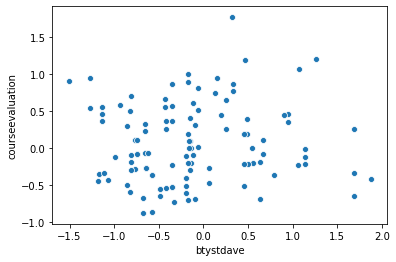

In [9]:
residua1 = preds1-y_test
sns.scatterplot(x=X['btystdave'], y=residua1)

# Model ze wszystkimi zmiennymi

In [10]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)
linmodel2= LinearRegression()
linmodel2.fit(X_train2, y_train2)

preds2 = linmodel2.predict(X_test2)
print(r2_score(y_test2, preds2))

0.8736348426485759


Mając wszystkie zmienne można znaleźć dość dobre dopasowanie. Sprawdźmy teraz które zmienne są najważniejsze. Dla regresji liniowej jednym ze sposobów zbadanie wag modelu.

In [14]:
np.shape(linmodel2.coef_)

(63,)

In [22]:
weigths = pd.DataFrame(index=X.columns, data=linmodel2.coef_)

#s = df.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
weigths.style.background_gradient(cmap='ocean')

,0
tenured,-0.0207272
profnumber,0.000479282
minority,-0.0985885
age,0.00369877
beautyf2upper,17272
beautyflowerdiv,-61732
beautyfupperdiv,0.244709
beautym2upper,-51160.3
beautymlowerdiv,-6391.72
beautymupperdiv,51975.5


## Wyjaśnienie nadmiernych wag

Współczynniki kilku zmiennych po dopasowaniu przyjęły bardzo duże wartości. Może to mówić o nadmiernym dopasowaniu modelu w tucj wymiarach. Możliwe, że ich wartość zmniejszyła by się przy użyciu regresji z regularyzacją - ridge lub lasso.

Same wagi nie są zbyt informatywne - duże znaczenie ma zakres samej zmiennej. 
Jako że model jest liniowy, sprawdzenie korelacji predyktorów z zwynikiem może dać informację o ważności. 

In [51]:
plt.figure(figsize=(12,12))
corr = df2.corr()
corr = corr['courseevaluation']
#corr.sort_values()

corrs = pd.DataFrame(data=corr, index=df2.columns)
#s = df.style.background_gradient(cmap=cm, low=0, high=1, axis=0)
corrs.sort_values(by='courseevaluation', inplace=True, ascending=False)
corrs.style.background_gradient(cmap='ocean')

,courseevaluation
courseevaluation,1
profevaluation,0.935097
onecredit,0.23524
percentevaluating,0.223139
beautyfupperdiv,0.199673
btystdmu,0.199092
beautymupperdiv,0.199092
btystdfu,0.196622
fulldept,0.196537
btystdave,0.189039


<Figure size 864x864 with 0 Axes>

Można zauważyć, że wynik jest bardzo wysoko skorelowany z profevaluation - możliwe, że mamy do czynienia z wyciekiem danych. Stąd też wysoki wynik modelu. W kolejnych modelach to pole nie będzie użyte. Teraz sprawdzimy 

In [55]:
best_predictors = corrs.index
best_predictors = best_predictors[2:] #Pozbycie się courseevaluation i profevaluation

### Model bez profevaluation

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[best_predictors], y)
linmodel3= LinearRegression()
linmodel3.fit(X_train3, y_train3)

preds3 = linmodel3.predict(X_test3)
print('R2: ' + str(r2_score(y_test3, preds3)))
print('MSE: ' + str(mean_squared_error(y_test3, preds3)))

R2: 0.19281835241331002
MSE: 0.22042669518471877


Wynik nie jest najlepszy. Przeprowadźmy jednak analizę czy wartości wyznaczone z korelacji są poprawne. Będziemy brać co raz więcej predyktorów, i trenowali nowe modele. Jeśli wyznaczone korelacje wskazują które zmienne są najważniejsze, przy dodaniu zmiennych z największą wartością zaobserwujemy największy wzrost R2.

In [61]:
best_predictors[-3:]

Index(['nonenglish', 'female', 'class15'], dtype='object')

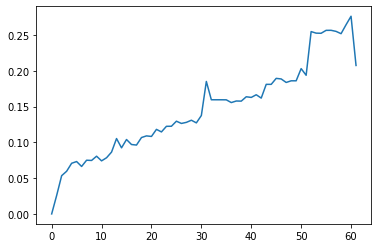

In [89]:
R2_scores = []
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y)

for i in range(1, len(best_predictors)+1):
    
    linmodel4= LinearRegression()
    linmodel4.fit(X_train4[best_predictors[-i:]], y_train4)

    preds4 = linmodel4.predict(X_test4[best_predictors[-i:]])
    R2_scores.append(r2_score(y_test4, preds4))
plt.plot(R2_scores)

Sprawdźmy teraz czy indywidualne predyktory będą w stanie nam coś powiedzieć.

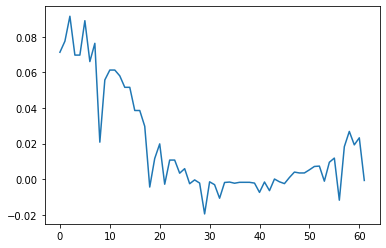

In [138]:
R2_scores = []
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y)

for i in range(0, len(best_predictors)):
    
    linmodel4= LinearRegression()
    linmodel4.fit(pd.DataFrame(X_train4[best_predictors[i:i+1]]), y_train4)

    preds4 = linmodel4.predict(pd.DataFrame(X_test4[best_predictors[i:i+1]]))
    R2_scores.append(r2_score(y_test4, preds4))
plt.plot(R2_scores)

Powyższy wykres mówi, że kilka pierwszych zmiennych ()jest ważne - pozwolą nam w minimalnym stopniu przewidzieć ocenę prowadzącego. Uznajmy że zmienna z R2 powyżej 0.02 jest pomocna - ok. 15 pierwszych zmiennych jest informatywne.

In [141]:
print('5 Najważniejszych zmiennych, to:')
for i in best_predictors[:5]:
    print(i)

5 Najważniejszych zmiennych to:
onecredit
percentevaluating
beautyfupperdiv
btystdmu
beautymupperdiv


In [153]:
R2_scores = []
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y)

linmodel5= LinearRegression()
linmodel5.fit(X_train5[best_predictors[:5]], y_train5)

preds5 = linmodel5.predict(X_test5[best_predictors[:5]])
print(r2_score(y_test5, preds5))

0.19320518947861143


5 zmiennych wspomnianych wyżej pozwala osiągnąc wysokie R2, bliskie temu ze wszystkimi innymi zmiennymi. Są one więc najważniejsze. Wykres residuów dla nich:

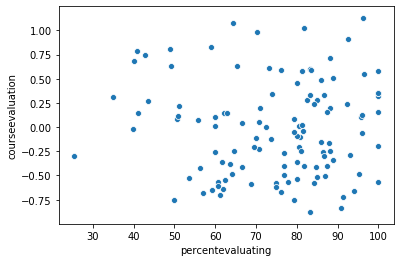

In [165]:
resid5 = preds5 - y_test5
sns.scatterplot(x=X_test5[best_predictors[1]], y=resid5)

### Dopasowanie modelu

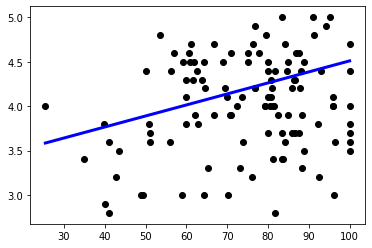

In [177]:
pred_sort['y_val'] = preds5
pred_sort.sort_values(by='vals', inplace=True)

plt.scatter(X_test5[best_predictors[1]], y_test5,  color='black')
plt.plot([X_test5[best_predictors[1]].min(), X_test5[best_predictors[1]].max()], [preds5.min(), preds5.max()], color='blue', linewidth=3)

## Model z interakcjami
Predyktory - kilka najważniejszych cech jako jako zwykłe zmienna, osatnia jako interakcja w postaci iloczynu reszty cech.

In [246]:
new = pd.DataFrame(data=s_X.prod(axis=1), columns=['Interaction'])
new['profevaluation'] = s_X['profevaluation']

0.9155515796231756


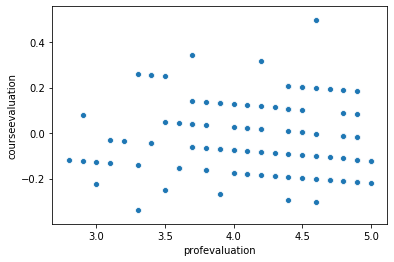

In [250]:
X_train, X_test, y_train, y_test = train_test_split(new, y)
linmodel_i = LinearRegression()
linmodel_i.fit(X_train, y_train)

preds = linmodel_i.predict(X_test)
print(r2_score(y_test, preds))


residua = preds-y_test
sns.scatterplot(x=X['profevaluation'], y=residua)

In [249]:
print(linmodel_i.coef_)
print(linmodel_i.intercept_)

[-4.33755821e-29  5.25507297e-01]
4.004656526355157


## Objaśnienie parametrów 

Intercept - gdy wszystkie parametry mają zero, a w przypadku ustandaryzowanych danych, wartość oczekiwaną, model zwraca ten wynik.  
Coef - jak każda główna składowa wpływa na wynik.  
Objaśnienie to dotyczy każdego z poprzednich modeli regresji liniowej